In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

plt.rcParams['figure.figsize'] = (20, 8)   
plt.rcParams['figure.dpi'] = 72             
plt.rcParams['font.size'] = 16               
plt.rcParams['text.usetex'] = False 

In [11]:
df = pd.concat([pd.read_csv('train_imputed.csv').drop('target', axis = 1), pd.read_csv('test_imputed.csv')], ignore_index = True)
train_df = pd.read_csv('train_imputed.csv')

In [17]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
import seaborn as sns

In [33]:
N = 1000
X = train_df.drop(['target', 'id'], axis = 1)
X = X.iloc[:N]
palette = sns.color_palette(n_colors = 2)
color = [palette[i] for i in train_df.target.iloc[:N]]

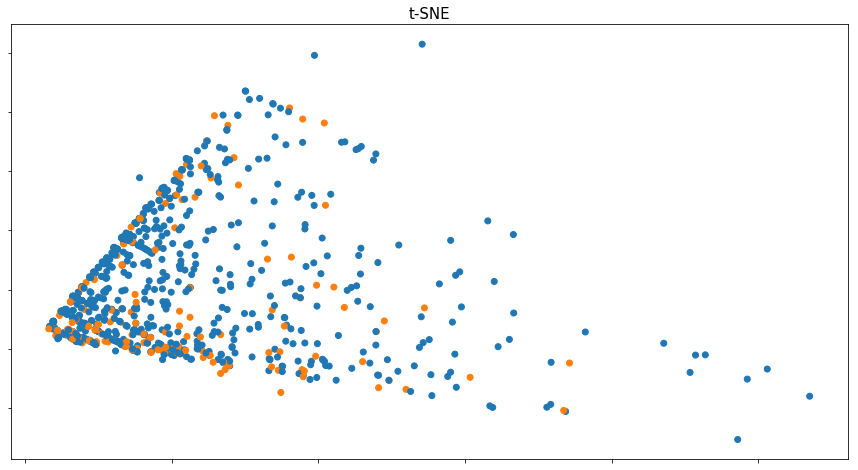

Wall time: 6.62 s


In [34]:
%%time
fig, ax = plt.subplots(1,1,figsize=(15, 8))
method = manifold.TSNE(n_components=n_components, 
                       init='pca',
                       early_exaggeration = 10000,
                       random_state=0)

Y = method.fit_transform(X)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("t-SNE", fontsize = 15)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')

plt.show()